#  (1) KNN으로 생선 종류 분류

사용 데이터: 도미의 생선 분류(출처: 혼자 공부하는 머신러닝+딥러닝 교재 저자)

In [ ]:
import pandas as pd

## 1.1) 데이터 분석

In [ ]:
# 데이터 불러오기
fish=pd.read_csv('https://bit.ly/fish_csv_data')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [ ]:
# 데이터타입 확인 - 데이터 프레임으로 저장되어 있음
type(fish)

pandas.core.frame.DataFrame

In [ ]:
# 칼럼의 종류 확인 -  칼럼은 타겟 칼럼 'Species'와 나머지 특성 칼럼 5개를 합쳐서 총 6개 존재
print(fish.columns)
print('columns number: ',len(fish.columns))

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')
columns number:  6


In [ ]:
# 칼럼별 데이터 타입 확인 - 
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
# 클래스인 Species 칼럼의 라벨 종류 확인
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
# 타겟을 제외한 칼럼을 나중에 모델에 데이터의 특성(X_train)으로 입력하기 위해 따로 분리
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy() # to_numpy()메서드를 추가한 이유는 모델의 입력 파라미터 형태로 넘파이를 요구하기 때문

In [ ]:
# 데이터의 특성 칼럼을 상위 5개만 보기
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
# 타겟 칼럼을 모델에 정답(y_train)으로 입력하기 위해 따로 분리
fish_target=fish['Species'].to_numpy()

## 1.2) train, test 데이터 분리 및 전처리

In [ ]:
# 훈련세트와 데이터 세트로 나눔
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(fish_input,fish_target,random_state=42) # test_size 생략시 디폴트 값은 0.25

In [ ]:
# 나눈 테스트 데이터의 target을 확인해 보면 각각의 데이터 feature에 대응하는 정답 클래스가 차례로 들어있다.
test_target

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch', 'Bream', 'Smelt',
       'Roach', 'Perch', 'Pike', 'Bream', 'Whitefish', 'Bream', 'Parkki',
       'Bream', 'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Perch', 'Perch', 'Whitefish',
       'Smelt', 'Smelt', 'Pike', 'Perch', 'Perch', 'Pike', 'Bream',
       'Perch', 'Roach', 'Roach', 'Parkki', 'Perch'], dtype=object)

In [ ]:
# 나눈 테스트 데이터의 feature 값
test_input

array([[7.80000e+01, 1.87000e+01, 1.94000e+01, 5.19920e+00, 3.12340e+00],
       [1.34000e+01, 1.24000e+01, 1.35000e+01, 2.43000e+00, 1.26900e+00],
       [2.00000e+02, 3.23000e+01, 3.48000e+01, 5.56800e+00, 3.37560e+00],
       [2.70000e+02, 2.60000e+01, 2.87000e+01, 8.38040e+00, 4.24760e+00],
       [1.50000e+02, 2.30000e+01, 2.45000e+01, 5.21850e+00, 3.62600e+00],
       [1.00000e+03, 3.70000e+01, 4.26000e+01, 1.89570e+01, 6.60300e+00],
       [7.00000e+00, 1.06000e+01, 1.16000e+01, 1.72840e+00, 1.14840e+00],
       [1.80000e+02, 2.52000e+01, 2.79000e+01, 7.08660e+00, 3.90600e+00],
       [1.88000e+02, 2.46000e+01, 2.62000e+01, 6.73340e+00, 4.16580e+00],
       [1.25000e+03, 5.60000e+01, 5.97000e+01, 1.06863e+01, 6.98490e+00],
       [6.50000e+02, 3.35000e+01, 3.87000e+01, 1.44738e+01, 5.72760e+00],
       [1.00000e+03, 4.00000e+01, 4.35000e+01, 1.23540e+01, 6.52500e+00],
       [6.00000e+02, 3.20000e+01, 3.72000e+01, 1.54380e+01, 5.58000e+00],
       [1.50000e+02, 2.00000e+01, 2.24

## 1.3) 모델링 & 예측

In [ ]:
# StandardScaler 클래스로 훈련 세트와 테스트 세트를 표준화 처리
from sklearn.preprocessing import StandardScaler

ss=StandardScaler() # 모델 객체에 할당
ss.fit(train_input) # 여기서 파라미터로 특성만 들어가는 이유는 숫자칼럼인 "특성만" 전처리하기 위함 (+data leackage 예방) 
train_scaled=ss.transform(train_input) # test data의 input 표준화 
test_scaled=ss.transform(test_input) # test data의 input도 마찬가지로 표준화해줌

In [ ]:
# KNN으로 확률 예측 - 스코어 측정
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.8907563025210085
0.85


In [ ]:
# KNN의 classes_ 속성으로 알파벳순으로 정렬된 타깃값 리스트 반환
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


## 1.4) 예측되는 과정 분석

In [ ]:
# 모델에서 앞에서 5번째 까지의 데이터의 클래스를 예측한 값
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
# 사이킷런의 분류 모델은 predict_proba() 메서드로 클래스별 확률 값(0~1) 반환
import numpy as np
proba=kn.predict_proba(test_scaled[:5])
print(kn.classes_)
print(np.round(proba, decimals=4)) # decimals=n은 소수점 n번째 자리까지 출력
# 설명 

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
# 4번째 샘플의 최근접 이웃 클래스 
distances,indexes=kn.kneighbors(test_scaled[3:4])
print(train_target[indexes]) # k=3으로 해서 주위 3개의 클래스 반환

[['Roach' 'Perch' 'Perch']]


# (2) 로지스틱 회귀로 이진 분류
- 로지스틱 회귀는 이름은 회귀이지만 분류모델로 선형 회귀와 동일하게 선형 방정식을 학습
- 위와 동일한 데이터를 사용

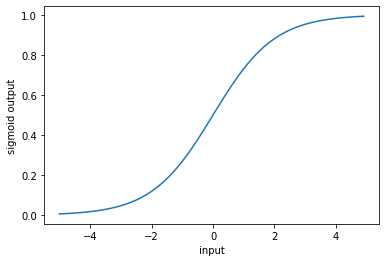

In [77]:
# 시그모이드 함수의 출력은 0~1 사이의 값으로 반환
import numpy as np
import matplotlib.pyplot as plt
z=np.arange(-5,5,0.1) # x축의 범위를 -5에서 5까지 0.1간격의 배열
phi=1/(1+np.exp(-z)) # 시그모이드 함수 식 코드로 변환
plt.plot(z,phi) # plt.plot(x값, y값)
plt.xlabel('input') 
plt.ylabel('sigmoid output')
plt.show()

## 2.1) 데이터 이진 라벨로 분리
- 클래스가 빙어(Bream)과 도미(Smelt)인 행만 골라내서 이진 분류 문제의 데이터로 만들어주기


In [ ]:
# 불리언 인덱싱은 True인 위치의 값만 반환도 해줌
char_arr=np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
# 빙어(Bream)과 도미(Smelt)인 행만 select해서 feature와 target으로 할당
bream_smelt_indexes=(train_target=='Bream')|(train_target=='Smelt')
train_bream_smelt=train_scaled[bream_smelt_indexes]
target_bream_smelt=train_target[bream_smelt_indexes]

## 2.2) 모델에 학습 후 예측 과정 분석

In [ ]:
# 선형회귀 모델 import
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)

LogisticRegression()

In [ ]:
# 이진 분류 모델의 클래스 보기
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [ ]:
# 상위 5개의 데이터 보기
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
# 클래스별 예측 확률
print(lr.classes_) # 차례로 0,1 클래스로 0이면 Bream, 1이면 Smelt
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
# 로지스틱 회귀가 학습한 계수 확인 intercept는 계수
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
# z 값 출력, decision_function은 양성 클래스에 대한 확률 출력
decisions=lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
# 위 z 값을 시그모이드 함수에 출력 값을 0~1로 바꾸기
from scipy.special import expit 
print(expit(decisions)) # expit가 시그모이드 함수

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


## 2.3) 모델로 전체 예측 후 스코어 측정

In [ ]:
# 데이터 분리
X_train,X_test,y_train,y_test=train_test_split(train_bream_smelt,target_bream_smelt)

In [ ]:
# 다시 학습 데이터만 학습
regression=LogisticRegression()
regression.fit(X_train,y_train) 

LogisticRegression()

In [ ]:
# 테스트 데이터로 예측
y_pred=regression.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test) # 정확도 측정

1.0

# (3) 로지스틱 회귀로 다중 분류
- LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용해서 매개변수 max_iter로 반복횟수 지정 가능 (디폴트는 100)
- KNN 1.3 절에서 전처리한 생선 데이터의 feature와 target 그대로 사용
<br><br>


분리된 데이터 프레임 종류 
- train_scaled: 라벨 7개 데이터의 feature(특성)
- test_scaled: 라벨 7개 데이터의 target(정답)
- train_bream_smelt: 라벨 2개 데이터의 feature(특성)
- target_bream_smelt: 라벨 2개 데이터의 target(정답)

## 3.1) 모델링 후 성능평가

In [ ]:
multi_lr=LogisticRegression(C=20,max_iter=1000)
multi_lr.fit(train_scaled, train_target)

# 학습데이터로 학습한 모델로 학습/테스트 데이터의 성능 평가
print(multi_lr.score(train_scaled,train_target))
print(multi_lr.score(test_scaled,test_target))

0.9327731092436975
0.925


## 3.2) 예측 과정 분석

In [78]:
# 상위 5개 데이터만 분석
print(multi_lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
# 5개 샘플에 대한 클래스 별 예측 확률
proba=multi_lr.predict_proba(test_scaled[:5])
print(multi_lr.classes_)
print(np.round(proba,decimals=3))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
# 다중 분류의 선형 방정식 shape 출력
print(multi_lr.coef_.shape,multi_lr.intercept_.shape) # 계수가 5개 세트인 행이 7개 존재, 절편도 7개

(7, 5) (7,)


In [ ]:
# 소프트맥스 함수를 이용해서 확률로 바꿔주기, 각 칼럼이 식 1개에 대한 z 값
decision=multi_lr.decision_function(test_scaled[:5])
print(np.round(decision,decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
# 위 z값을 소프트맥스 함수로 확률로 바꿔주면 위 클래스의 예측 확률과 동일ㅂ
from scipy.special import softmax
proba=softmax(decision,axis=1)
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
